Restaurant Revenue Prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt

In [2]:
trainset=pd.read_csv('train.csv',parse_dates=True)
testset=pd.read_csv('test.csv',parse_dates=True)

In [3]:
trainset.shape

(137, 43)

In [4]:
testset.shape

(100000, 42)

In [5]:
trainset.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


Removing id column

In [6]:
trainset.drop(['Id'], axis = 1,inplace=True)

testset.drop(['Id'], axis = 1,inplace=True)

In [7]:
trainset.shape

(137, 42)

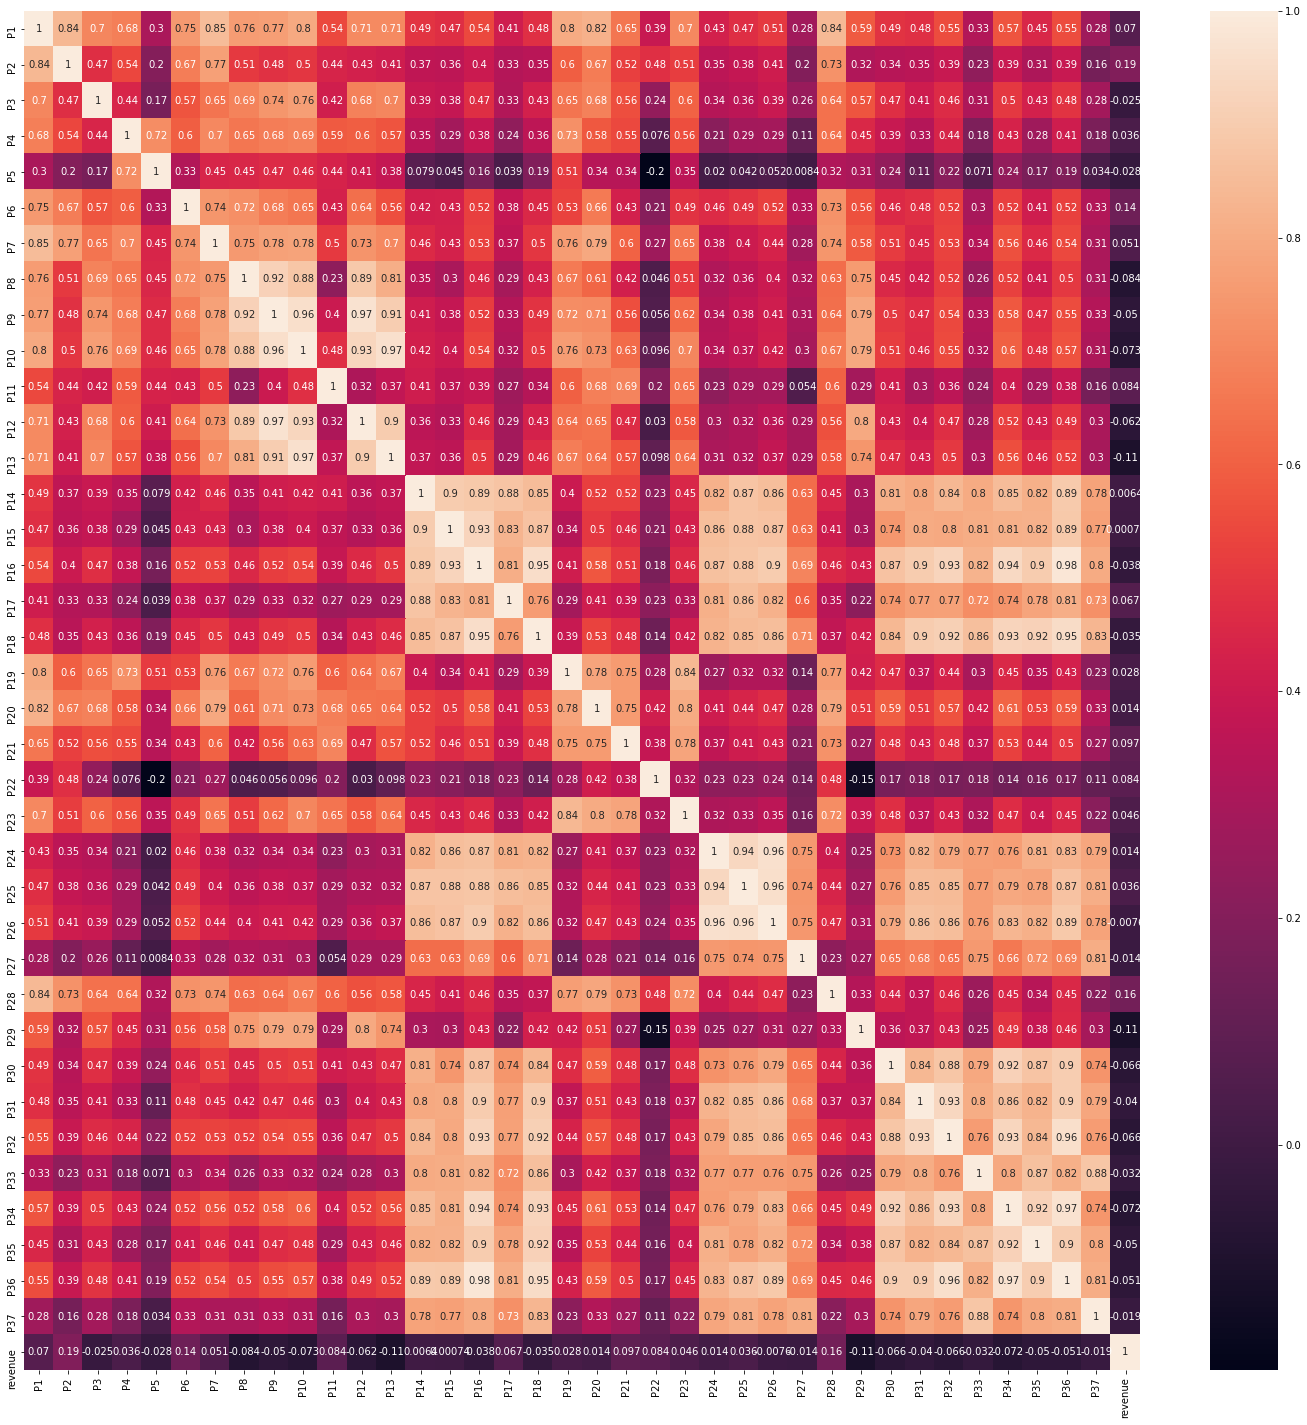

In [8]:
plt.figure(figsize=(25,25))
sns.heatmap(trainset.corr(),annot=True)

Checking for null values

In [9]:
trainset.isnull().sum()

Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [10]:
testset.isnull().sum()

Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
dtype: int64

In [11]:
trainset.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [12]:
print(trainset['City'].unique())
print(trainset['City Group'].unique())
print(trainset['Type'].unique())

print(testset['City'].unique())
print(testset['City Group'].unique())
print(testset['Type'].unique())

['İstanbul' 'Ankara' 'Diyarbakır' 'Tokat' 'Gaziantep' 'Afyonkarahisar'
 'Edirne' 'Kocaeli' 'Bursa' 'İzmir' 'Sakarya' 'Elazığ' 'Kayseri'
 'Eskişehir' 'Şanlıurfa' 'Samsun' 'Adana' 'Antalya' 'Kastamonu' 'Uşak'
 'Muğla' 'Kırklareli' 'Konya' 'Karabük' 'Tekirdağ' 'Denizli' 'Balıkesir'
 'Aydın' 'Amasya' 'Kütahya' 'Bolu' 'Trabzon' 'Isparta' 'Osmaniye']
['Big Cities' 'Other']
['IL' 'FC' 'DT']
['Niğde' 'Konya' 'Ankara' 'Kocaeli' 'Afyonkarahisar' 'Eskişehir' 'Rize'
 'İstanbul' 'Trabzon' 'Antalya' 'Muğla' 'Düzce' 'Adana' 'Bursa' 'Aydın'
 'Hatay' 'Denizli' 'İzmir' 'Gaziantep' 'Samsun' 'Erzurum' 'Edirne'
 'Balıkesir' 'Mersin' 'Zonguldak' 'Malatya' 'Çanakkale' 'Kars' 'Bolu'
 'Batman' 'Bilecik' 'Giresun' 'Tekirdağ' 'Sivas' 'Kırıkkale' 'Mardin'
 'Erzincan' 'Manisa' 'Diyarbakır' 'Kahramanmaraş' 'Yalova' 'Tanımsız'
 'Sakarya' 'Kırşehir' 'Aksaray' 'Kayseri' 'Nevşehir' 'Çorum' 'Ordu'
 'Kırklareli' 'Şanlıurfa' 'Artvin' 'Uşak' 'Kütahya' 'Siirt' 'Çankırı'
 'Isparta']
['Other' 'Big Cities']
['FC' 'IL' 'DT' 'MB

Plotting Count plots

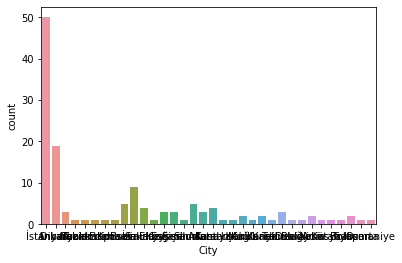

In [13]:
sns.countplot(x = trainset['City'])

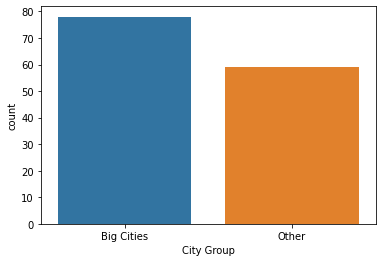

In [14]:
sns.countplot(x = trainset['City Group'])

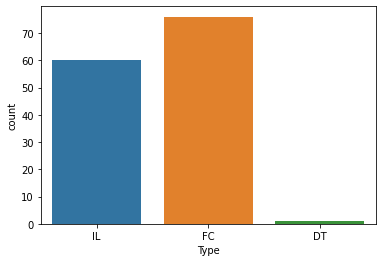

In [15]:
sns.countplot(x = trainset['Type'])

In [16]:
trainset.value_counts('Type')

Type
FC    76
IL    60
DT     1
dtype: int64

In [17]:
testset.value_counts('Type')

Type
FC    57019
IL    40447
DT     2244
MB      290
dtype: int64

Replacing 'MB' in test set with 'FC'

In [18]:
testset.Type = testset.Type.replace({"MB": "FC"})

In [19]:
testset.value_counts('Type')

Type
FC    57309
IL    40447
DT     2244
dtype: int64

Label encoding City Group column

In [20]:
from sklearn.preprocessing import LabelEncoder
trainset['City Group'] = LabelEncoder().fit_transform(trainset['City Group'])

from sklearn.preprocessing import LabelEncoder
testset['City Group'] = LabelEncoder().fit_transform(testset['City Group'])

In [21]:
trainset.head()  #0:Big Cities and 1:Other

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,0,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,0,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,1,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,1,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,1,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [22]:
trainset.shape

(137, 42)

In [23]:
testset.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,01/22/2011,Niğde,1,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,03/18/2011,Konya,1,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,10/30/2013,Ankara,0,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,05/06/2013,Kocaeli,1,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,07/31/2013,Afyonkarahisar,1,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0


Getting X_train and y_train

In [24]:
X_train=trainset.iloc[:,0:41]
y_train=trainset.iloc[:,41]


In [25]:
print(X_train)

      Open Date        City  City Group Type  P1  ...  P33  P34  P35  P36  P37
0    07/17/1999    İstanbul           0   IL   4  ...    5    5    4    3    4
1    02/14/2008      Ankara           0   FC   4  ...    0    0    0    0    0
2    03/09/2013  Diyarbakır           1   IL   2  ...    0    0    0    0    0
3    02/02/2012       Tokat           1   IL   6  ...    6   18   12   12    6
4    05/09/2009   Gaziantep           1   IL   3  ...    2    3    4    3    3
..          ...         ...         ...  ...  ..  ...  ...  ...  ...  ...  ...
132  06/25/2008     Trabzon           1   FC   2  ...    0    0    0    0    0
133  10/12/2006       İzmir           0   FC   4  ...    0    0    0    0    0
134  07/08/2006     Kayseri           1   FC   3  ...    0    0    0    0    0
135  10/29/2010    İstanbul           0   FC   4  ...    0    0    0    0    0
136  09/01/2009    İstanbul           0   FC   4  ...    0    0    0    0    0

[137 rows x 41 columns]


In [26]:
print(y_train)

0      5653753.0
1      6923131.0
2      2055379.0
3      2675511.0
4      4316715.0
         ...    
132    5787594.0
133    9262754.0
134    2544857.0
135    7217634.0
136    6363241.0
Name: revenue, Length: 137, dtype: float64


One hot encoding Type column

In [27]:
column_dummies=['Type']
X_train = pd.get_dummies(X_train,columns=column_dummies, prefix_sep='_', drop_first=True)

testset = pd.get_dummies(testset,columns=column_dummies, prefix_sep='_', drop_first=True)

In [28]:
testset.head()

,Open Date,City,City Group,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,Type_FC,Type_IL
0,01/22/2011,Niğde,1,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,1,0
1,03/18/2011,Konya,1,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,0,1
2,10/30/2013,Ankara,0,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,1,0
3,05/06/2013,Kocaeli,1,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,0,1
4,07/31/2013,Afyonkarahisar,1,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,1,0


In [29]:
print(X_train)

      Open Date        City  City Group  P1  ...  P36  P37  Type_FC  Type_IL
0    07/17/1999    İstanbul           0   4  ...    3    4        0        1
1    02/14/2008      Ankara           0   4  ...    0    0        1        0
2    03/09/2013  Diyarbakır           1   2  ...    0    0        0        1
3    02/02/2012       Tokat           1   6  ...   12    6        0        1
4    05/09/2009   Gaziantep           1   3  ...    3    3        0        1
..          ...         ...         ...  ..  ...  ...  ...      ...      ...
132  06/25/2008     Trabzon           1   2  ...    0    0        1        0
133  10/12/2006       İzmir           0   4  ...    0    0        1        0
134  07/08/2006     Kayseri           1   3  ...    0    0        1        0
135  10/29/2010    İstanbul           0   4  ...    0    0        1        0
136  09/01/2009    İstanbul           0   4  ...    0    0        1        0

[137 rows x 42 columns]


Splitting open date column to get the year of opening

---



In [30]:
X_train['Open Date']=X_train["Open Date"].transform(lambda x: int(x.split("/")[-1]))

testset['Open Date']=testset["Open Date"].transform(lambda x: int(x.split("/")[-1]))

In [31]:
testset.head()

,Open Date,City,City Group,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,Type_FC,Type_IL
0,2011,Niğde,1,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,1,0
1,2011,Konya,1,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,0,1
2,2013,Ankara,0,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,1,0
3,2013,Kocaeli,1,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,0,1
4,2013,Afyonkarahisar,1,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,1,0


Adding a new current_year column

In [32]:
X_train['current_year']=2021

testset['current_year']=2021

In [33]:
print(X_train)

     Open Date        City  City Group  P1  ...  P37  Type_FC  Type_IL  current_year
0         1999    İstanbul           0   4  ...    4        0        1          2021
1         2008      Ankara           0   4  ...    0        1        0          2021
2         2013  Diyarbakır           1   2  ...    0        0        1          2021
3         2012       Tokat           1   6  ...    6        0        1          2021
4         2009   Gaziantep           1   3  ...    3        0        1          2021
..         ...         ...         ...  ..  ...  ...      ...      ...           ...
132       2008     Trabzon           1   2  ...    0        1        0          2021
133       2006       İzmir           0   4  ...    0        1        0          2021
134       2006     Kayseri           1   3  ...    0        1        0          2021
135       2010    İstanbul           0   4  ...    0        1        0          2021
136       2009    İstanbul           0   4  ...    0        1    

Getting age of the restaurant and making a column for it

In [34]:
X_train['age']=X_train['current_year']-X_train['Open Date']

testset['age']=testset['current_year']-testset['Open Date']

In [35]:
print(X_train)

     Open Date        City  City Group  P1  ...  Type_FC  Type_IL  current_year  age
0         1999    İstanbul           0   4  ...        0        1          2021   22
1         2008      Ankara           0   4  ...        1        0          2021   13
2         2013  Diyarbakır           1   2  ...        0        1          2021    8
3         2012       Tokat           1   6  ...        0        1          2021    9
4         2009   Gaziantep           1   3  ...        0        1          2021   12
..         ...         ...         ...  ..  ...      ...      ...           ...  ...
132       2008     Trabzon           1   2  ...        1        0          2021   13
133       2006       İzmir           0   4  ...        1        0          2021   15
134       2006     Kayseri           1   3  ...        1        0          2021   15
135       2010    İstanbul           0   4  ...        1        0          2021   11
136       2009    İstanbul           0   4  ...        1        0

In [36]:
testset.head()

,Open Date,City,City Group,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,Type_FC,Type_IL,current_year,age
0,2011,Niğde,1,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,1,0,2021,10
1,2011,Konya,1,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,0,1,2021,10
2,2013,Ankara,0,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,1,0,2021,8
3,2013,Kocaeli,1,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,0,1,2021,8
4,2013,Afyonkarahisar,1,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,1,0,2021,8


Dropping open date and current_year columns

In [37]:
X_train.drop(['Open Date','current_year'],axis=1,inplace=True)

testset.drop(['Open Date','current_year'],axis=1,inplace=True)

In [38]:
print(X_train)

           City  City Group  P1   P2   P3  ...  P36  P37  Type_FC  Type_IL  age
0      İstanbul           0   4  5.0  4.0  ...    3    4        0        1   22
1        Ankara           0   4  5.0  4.0  ...    0    0        1        0   13
2    Diyarbakır           1   2  4.0  2.0  ...    0    0        0        1    8
3         Tokat           1   6  4.5  6.0  ...   12    6        0        1    9
4     Gaziantep           1   3  4.0  3.0  ...    3    3        0        1   12
..          ...         ...  ..  ...  ...  ...  ...  ...      ...      ...  ...
132     Trabzon           1   2  3.0  3.0  ...    0    0        1        0   13
133       İzmir           0   4  5.0  4.0  ...    0    0        1        0   15
134     Kayseri           1   3  4.0  4.0  ...    0    0        1        0   15
135    İstanbul           0   4  5.0  4.0  ...    0    0        1        0   11
136    İstanbul           0   4  5.0  3.0  ...    0    0        1        0   12

[137 rows x 42 columns]


In [39]:
X_train.value_counts('City')

City
İstanbul          50
Ankara            19
İzmir              9
Bursa              5
Samsun             5
Antalya            4
Sakarya            4
Eskişehir          3
Kayseri            3
Adana              3
Tekirdağ           3
Diyarbakır         3
Muğla              2
Aydın              2
Konya              2
Trabzon            2
Edirne             1
Balıkesir          1
Bolu               1
Amasya             1
Denizli            1
Afyonkarahisar     1
Şanlıurfa          1
Elazığ             1
Gaziantep          1
Isparta            1
Kastamonu          1
Kocaeli            1
Kütahya            1
Kırklareli         1
Osmaniye           1
Tokat              1
Uşak               1
Karabük            1
dtype: int64

In [40]:
testset.value_counts('City')

City
İstanbul          34087
Ankara             8720
İzmir              6465
Antalya            5911
Kocaeli            4364
Mersin             2735
Adana              2514
Balıkesir          2463
Bursa              2441
Muğla              1823
Aydın              1617
Tekirdağ           1577
Konya              1576
Gaziantep          1487
Edirne             1230
Manisa             1227
Çanakkale           965
Denizli             964
Diyarbakır          954
Hatay               951
Zonguldak           926
Eskişehir           900
Trabzon             660
Aksaray             650
Bolu                631
Yalova              630
Kırıkkale           622
Malatya             616
Mardin              610
Şanlıurfa           609
Batman              604
Sakarya             604
Rize                345
Artvin              344
Bilecik             339
Afyonkarahisar      331
Nevşehir            328
Sivas               326
Samsun              324
Kayseri             323
Kırşehir            319
Erzincan   

Encoding City column

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X_train['City']=le.fit_transform(X_train['City'])
testset['City']=le.fit_transform(testset['City'])

In [42]:
print(X_train)

     City  City Group  P1   P2   P3   P4  ...  P35  P36  P37  Type_FC  Type_IL  age
0      31           0   4  5.0  4.0  4.0  ...    4    3    4        0        1   22
1       3           0   4  5.0  4.0  4.0  ...    0    0    0        1        0   13
2      10           1   2  4.0  2.0  5.0  ...    0    0    0        0        1    8
3      28           1   6  4.5  6.0  6.0  ...   12   12    6        0        1    9
4      14           1   3  4.0  3.0  4.0  ...    4    3    3        0        1   12
..    ...         ...  ..  ...  ...  ...  ...  ...  ...  ...      ...      ...  ...
132    29           1   2  3.0  3.0  5.0  ...    0    0    0        1        0   13
133    32           0   4  5.0  4.0  4.0  ...    0    0    0        1        0   15
134    18           1   3  4.0  4.0  4.0  ...    0    0    0        1        0   15
135    31           0   4  5.0  4.0  5.0  ...    0    0    0        1        0   11
136    31           0   4  5.0  3.0  5.0  ...    0    0    0        1       

In [43]:
testset.head()

,City,City Group,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,Type_FC,Type_IL,age
0,38,1,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,1,0,10
1,27,1,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,0,1,10
2,3,0,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,1,0,8
3,26,1,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,0,1,8
4,1,1,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,1,0,8


Checking feature importance

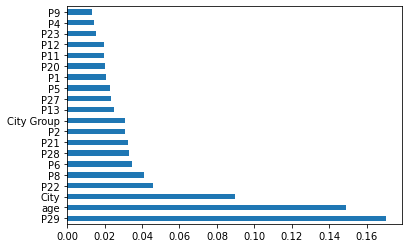

In [44]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

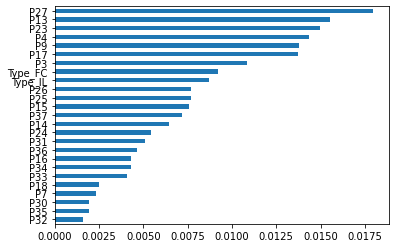

In [45]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(25).plot(kind='barh')
plt.show()

Feature Scaling age column

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,41:42] = sc.fit_transform(X_train.iloc[:,41:42])   #age
testset.iloc[:,41:42] = sc.fit_transform(testset.iloc[:,41:42])

In [47]:
print(X_train)

     City  City Group  P1   P2   P3  ...  P36  P37  Type_FC  Type_IL       age
0      31           0   4  5.0  4.0  ...    3    4        0        1  2.412090
1       3           0   4  5.0  4.0  ...    0    0        1        0  0.169174
2      10           1   2  4.0  2.0  ...    0    0        0        1 -1.076891
3      28           1   6  4.5  6.0  ...   12    6        0        1 -0.827678
4      14           1   3  4.0  3.0  ...    3    3        0        1 -0.080039
..    ...         ...  ..  ...  ...  ...  ...  ...      ...      ...       ...
132    29           1   2  3.0  3.0  ...    0    0        1        0  0.169174
133    32           0   4  5.0  4.0  ...    0    0        1        0  0.667599
134    18           1   3  4.0  4.0  ...    0    0        1        0  0.667599
135    31           0   4  5.0  4.0  ...    0    0        1        0 -0.329252
136    31           0   4  5.0  3.0  ...    0    0        1        0 -0.080039

[137 rows x 42 columns]


In [48]:
testset.head()

,City,City Group,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,Type_FC,Type_IL,age
0,38,1,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,1,0,-0.583631
1,27,1,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,0,1,-0.583631
2,3,0,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,1,0,-1.002011
3,26,1,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,0,1,-1.002011
4,1,1,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,1,0,-1.002011


Building SVR model

In [49]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X_train,y_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [50]:
y_pred=regressor.predict(testset)

In [51]:
result_data = pd.read_csv("sampleSubmission.csv")
output = pd.DataFrame({'Id': result_data.Id, 'Prediction': y_pred})
output.to_csv('my_submission1.csv', index=False)   #1720/2257
#public score:1902940.22904

Using Random Forest Regressor

In [52]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
#param_grid = {
#    'bootstrap': [True],
#    'max_depth': [80, 90, 100, 110,120,130],
#    'max_features': [2, 3],
#    'min_samples_leaf': [3, 4, 5],
#    'min_samples_split': [8, 10, 12,14,16,18,20],
#    'n_estimators': [100, 200, 300, 1000,1500,2000]
#}
# Create a based model
#regressor1 = RandomForestRegressor()
# Instantiate the grid search model
#grid_search = GridSearchCV(estimator = regressor1, param_grid = param_grid, 
 #                         cv = 3, n_jobs = -1, verbose = 2)

In [53]:
#grid_search.fit(X_train, y_train)
#grid_search.best_params_

In [54]:
from sklearn.ensemble import RandomForestRegressor
regressor1=RandomForestRegressor(max_depth=80, max_features=2, min_samples_leaf=4,
                        min_samples_split=8, n_estimators= 1000)

regressor1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [55]:
y_pred1=regressor1.predict(testset)

In [56]:
result_data1 = pd.read_csv("sampleSubmission.csv")
output = pd.DataFrame({'Id': result_data.Id, 'Prediction': y_pred1})
output.to_csv('my_submission2.csv', index=False)   #944/2257:public and 600/2257 private
#public score:1753161.51270 private:1832224.58858
#In this competition, lower is better 

Removing 'City' column and checking the results

In [57]:
X_train.drop(['City'],axis=1,inplace=True)

testset.drop(['City'],axis=1,inplace=True)

In [58]:
print(X_train)

     City Group  P1   P2   P3   P4  ...  P36  P37  Type_FC  Type_IL       age
0             0   4  5.0  4.0  4.0  ...    3    4        0        1  2.412090
1             0   4  5.0  4.0  4.0  ...    0    0        1        0  0.169174
2             1   2  4.0  2.0  5.0  ...    0    0        0        1 -1.076891
3             1   6  4.5  6.0  6.0  ...   12    6        0        1 -0.827678
4             1   3  4.0  3.0  4.0  ...    3    3        0        1 -0.080039
..          ...  ..  ...  ...  ...  ...  ...  ...      ...      ...       ...
132           1   2  3.0  3.0  5.0  ...    0    0        1        0  0.169174
133           0   4  5.0  4.0  4.0  ...    0    0        1        0  0.667599
134           1   3  4.0  4.0  4.0  ...    0    0        1        0  0.667599
135           0   4  5.0  4.0  5.0  ...    0    0        1        0 -0.329252
136           0   4  5.0  3.0  5.0  ...    0    0        1        0 -0.080039

[137 rows x 41 columns]


In [59]:
testset.head()

,City Group,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,Type_FC,Type_IL,age
0,1,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,1,0,-0.583631
1,1,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,0,1,-0.583631
2,0,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,1,0,-1.002011
3,1,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,0,1,-1.002011
4,1,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,1,0,-1.002011


In [60]:
from sklearn.ensemble import RandomForestRegressor
regressor2=RandomForestRegressor(max_depth=80, max_features=2, min_samples_leaf=4,
                        min_samples_split=8, n_estimators= 1000)

regressor2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [61]:
y_pred2=regressor2.predict(testset)

In [62]:
result_data2 = pd.read_csv("sampleSubmission.csv")
output = pd.DataFrame({'Id': result_data.Id, 'Prediction': y_pred2})
output.to_csv('my_submission3.csv', index=False)  
#private:1806816.08716 public:1710811.38451
#237/2257              554/2257

Feature scaling P1-P37 and seeing its impact on the result

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,1:38] = sc.fit_transform(X_train.iloc[:,1:38])   #p1-p37
testset.iloc[:,1:38] = sc.fit_transform(testset.iloc[:,1:38])

In [64]:
testset.head()

,City Group,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,Type_FC,Type_IL,age
0,1,-1.097791,-0.299599,-0.255683,-0.382329,-0.928924,-0.575870,-0.137939,-0.541757,-0.147643,-0.260247,0.816340,-1.167707,-1.109560,-0.512698,-0.602477,-0.550779,0.346587,-0.563756,-0.033034,0.118796,0.181162,-1.049298,0.076289,-0.588549,-0.596775,-0.554057,-0.534273,-0.577430,-0.047087,-0.483425,-0.517056,-0.489172,-0.643361,-0.450052,-0.567659,-0.517346,-0.580411,1,0,-0.583631
1,1,-0.386793,-0.299599,-0.255683,-0.382329,0.009772,-0.575870,-0.137939,-1.123666,-0.734971,-0.827272,-0.634261,-0.601255,-0.088458,-0.512698,-0.602477,-0.550779,-0.475567,-0.563756,-0.033034,0.118796,0.181162,-0.315718,-0.559420,-0.588549,-0.596775,-0.554057,-0.534273,-1.045445,-0.047087,-0.483425,-0.517056,-0.489172,-0.643361,-0.450052,-0.567659,-0.517346,-0.580411,0,1,-0.583631
2,0,-0.386793,-0.299599,-0.255683,-0.382329,0.009772,-0.575870,-0.137939,-0.541757,-0.734971,-0.260247,0.332807,-0.034803,-0.088458,-0.512698,-0.602477,-0.550779,-0.475567,-0.563756,-0.033034,0.118796,0.972917,1.885022,0.288193,-0.588549,-0.596775,-0.554057,-0.534273,-0.577430,-0.047087,-0.483425,-0.517056,-0.489172,-0.643361,-0.450052,-0.567659,-0.517346,-0.580411,1,0,-1.002011
3,1,-0.742292,-0.299599,-0.255683,-0.382329,0.009772,0.077118,-0.137939,-0.541757,-0.147643,-0.827272,-0.150727,-0.601255,-0.088458,-0.512698,-0.602477,-0.550779,-0.475567,0.756153,-0.205880,-0.158027,0.181162,-0.315718,-0.347517,-0.588549,-0.596775,-0.554057,-0.534273,-0.577430,-0.047087,-0.483425,1.216097,-0.489172,-0.643361,-0.450052,-0.567659,-0.517346,-0.580411,0,1,-1.002011
4,1,-0.742292,-0.299599,-0.255683,-0.382329,-0.928924,-0.575870,-0.137939,-0.541757,-0.147643,-0.827272,-0.150727,-0.034803,-1.109560,-0.512698,-0.602477,-0.550779,-0.475567,-0.563756,-0.724418,0.118796,0.181162,-1.049298,-0.559420,-0.588549,-0.596775,-0.554057,-0.534273,0.826615,-0.047087,-0.483425,-0.517056,-0.489172,-0.643361,-0.450052,-0.567659,-0.517346,-0.580411,1,0,-1.002011


In [65]:
from sklearn.ensemble import RandomForestRegressor
regressor3=RandomForestRegressor(max_depth=80, max_features=2, min_samples_leaf=4,
                        min_samples_split=8, n_estimators= 1000)

regressor3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [66]:
y_pred3=regressor3.predict(testset)

In [67]:
result_data3 = pd.read_csv("sampleSubmission.csv")
output = pd.DataFrame({'Id': result_data.Id, 'Prediction': y_pred3})
output.to_csv('my_submission4.csv', index=False)  
#private:1815663.66111 public:1741179.23936
